In [16]:
%reload_ext autoreload
%autoreload 2

In [17]:
import matplotlib.pyplot as plt
import torch

from src.config import DATA_DIR, ROOT_DIR, ENDS, DEFAULT_CHARS
from src.data.names import Names
from src.bigram.bigram import BigramModel
from src.nnet.nnet import BigramNnet

# Data

In [18]:
# def create_female_name_database():
#     # Get list of relevant filenames
#     files = [
#         filename
#         for filename in os.listdir(DATA_DIR)
#         if filename.endswith(".txt") and filename.startswith("yob")
#     ]
#     all_data = {}
#     # Read each file
#     for filename in files:
#         with open(DATA_DIR / filename) as f:
#             for line in f:
#                 line_data = line.strip().lower().split(",")
#                 # Select only female names from each file
#                 if line_data[1] == "f":
#                     count = int(line_data[2])
#                     if line_data[0] in all_data:
#                         all_data[line_data[0]] += count
#                     else:
#                         all_data[line_data[0]] = count
#     # Write to new file
#     with open(DATA_DIR / "all_names.txt", "w") as f:
#         for name, count in all_data.items():
#             f.write(f"{name},{count}\n")


# create_female_name_database()

In [19]:
female_names = Names.from_file(DATA_DIR / "all_names.txt", counts=True)

In [20]:
female_names.train_test_split(0.8)
sum(female_names.train.values()) / sum(female_names.test.values())

4.000181431594353

Max length:  15
Min length:  2
Avg length:  6.0008862761227455


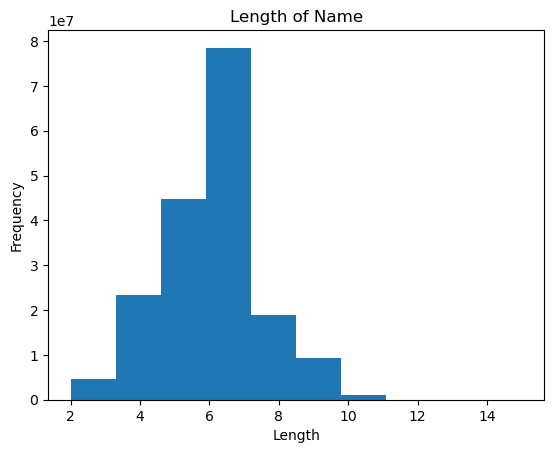

In [21]:
female_names.eda()

# Bigram model

In [22]:
female_names.train_bigrams = Names.to_bigrams(female_names.train)

In [23]:
model = BigramModel()
model.train(female_names.train_bigrams, female_names.chars)
# model.visualise()

## Calculating losses

In [24]:
female_names.test_bigrams = Names.to_bigrams(female_names.test)
model.evaluate(female_names.test_bigrams)

{'baseline_train_loss': tensor(3.2958),
 'baseline_test_loss': tensor(3.2958),
 'model_train_loss': tensor(2.2022),
 'model_test_loss': tensor(2.3570)}

In [25]:
random_name = Names.from_dict({"ruby": 1})
random_name_bigram = Names.to_bigrams(random_name.data)
random_bigram_array = model.create_bigram_array(random_name_bigram, model.charlist, 0)[
    0
]
model.loss(random_bigram_array, model.bigram_probs)

tensor(2.6593)

## Train on full dataset

In [26]:
female_names.all_bigrams = Names.to_bigrams(female_names.data)
model.train(female_names.all_bigrams, female_names.chars)

In [27]:
torch.save(model, ROOT_DIR / "models" / "bigram.pt")

## Prediction

In [28]:
model = torch.load(ROOT_DIR / "models" / "bigram.pt")
generator = torch.Generator().manual_seed(36)
for _ in range(30):
    print(model.predict(generator=generator))

costaury
e
cevelonnare
jostelich
stiarce
cqun
ke
doreride
emman
kry
bonia
mistia
brolmama
eann
cooniendrlofria
dis
mie
celil
visie
ka
dirben
t
ph
mugiaydra
tta
ann
milea
cathanelodrisutendan
geuteya
ria


# Bigram Neural Net

## Transform data

In [29]:
# Get char to index mappings
mapping_i2c, mapping_c2i = BigramModel.get_mapping(female_names.chars)
# Get data in the form of input/output tensors and weight tensors
(
    female_names.x_train,
    female_names.y_train,
    female_names.weights_train,
) = Names.to_bigram_tensor(female_names.train_bigrams, mapping_c2i)

# Get test set in form of tensors
(
    female_names.x_test,
    female_names.y_test,
    female_names.weights_test,
) = Names.to_bigram_tensor(female_names.test_bigrams, mapping_c2i)

## Train

In [30]:
# Initialise neural net
bigram_nnet = BigramNnet([len(DEFAULT_CHARS), len(DEFAULT_CHARS)], biases=False, reg=0)
# Train the model
bigram_nnet.train(
    x=female_names.x_train,
    y=female_names.y_train,
    weights=female_names.weights_train,
    val_x=female_names.x_test,
    val_y=female_names.y_test,
    val_weights=female_names.weights_test,
    epochs=100000,
    lr=0.01,
)

Epoch 0: Train loss = 3.7156314849853516
Val loss = 3.7295730113983154


Epoch 10000: Train loss = 2.9877021312713623
Val loss = 3.0599329471588135
Epoch 20000: Train loss = 2.726703405380249
Val loss = 2.824694871902466
Epoch 30000: Train loss = 2.5877182483673096
Val loss = 2.7014594078063965
Epoch 40000: Train loss = 2.5030367374420166
Val loss = 2.6272778511047363
Epoch 50000: Train loss = 2.4478511810302734
Val loss = 2.5789833068847656
Epoch 60000: Train loss = 2.409416437149048
Val loss = 2.5451502799987793
Epoch 70000: Train loss = 2.3810648918151855
Val loss = 2.5200209617614746
Epoch 80000: Train loss = 2.359269380569458
Val loss = 2.5006353855133057
Epoch 90000: Train loss = 2.3420042991638184
Val loss = 2.48525333404541


In [32]:
# Initialise neural net
bigram_nnet = BigramNnet([len(DEFAULT_CHARS), len(DEFAULT_CHARS)], biases=False, reg=0)
bigram_nnet.train(
    x=female_names.x_train,
    y=female_names.y_train,
    weights=female_names.weights_train,
    val_x=female_names.x_test,
    val_y=female_names.y_test,
    val_weights=female_names.weights_test,
    epochs=100000,
    lr=0.05,
)

Epoch 0: Train loss = 3.7156314849853516
Val loss = 3.7295730113983154
Epoch 10000: Train loss = 2.4478416442871094
Val loss = 2.5789759159088135
Epoch 20000: Train loss = 2.3280067443847656
Val loss = 2.4728176593780518
Epoch 30000: Train loss = 2.2857651710510254
Val loss = 2.435734987258911
Epoch 40000: Train loss = 2.2649986743927
Val loss = 2.418121337890625
Epoch 50000: Train loss = 2.2525687217712402
Val loss = 2.40773344039917
Epoch 60000: Train loss = 2.244189977645874
Val loss = 2.4006450176239014
Epoch 70000: Train loss = 2.2381136417388916
Val loss = 2.3953726291656494
Epoch 80000: Train loss = 2.233485698699951
Val loss = 2.391230344772339
Epoch 90000: Train loss = 2.2298362255096436
Val loss = 2.387864589691162


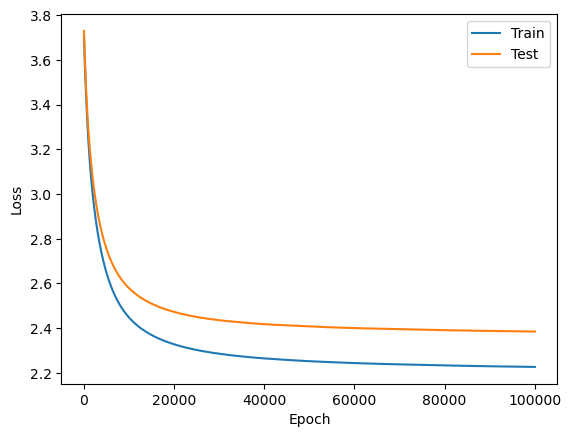

In [33]:
# Plot the loss history
plt.plot(bigram_nnet.loss_history["train"], label="Train")
plt.plot(bigram_nnet.loss_history["test"], label="Test")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

The bigram model's bigram_array is a 2D lookup table giving us the probabilities of each character following the previous character. 

The simple 1-layer neural net using one-hot encoding is also equivalent to a 2D lookup table, but instead of being trained by counting, it's trained by gradient descent.
 - The input being a one-hot encoding (0s everywhere, with a single 1) means that when multiplied by the weights, we get the row of the weights corresponding to the input character.
 - However, the weights don't correspond directly to probabilities, since we apply a softmax i.e. we need to take their exponent to get counts and normalise to get probabilities

 The two tensors below which both represent probabilities given a first character of a are roughly equivalent

In [34]:
a = model.bigram_probs[0]
a

tensor([1.1989e-03, 2.3257e-02, 2.0507e-02, 1.8542e-02, 5.3319e-03, 2.7790e-04,
        3.3827e-03, 2.6770e-02, 2.2687e-02, 4.6566e-04, 3.6434e-03, 5.0748e-02,
        3.4807e-02, 1.7477e-01, 1.2802e-03, 1.8968e-03, 6.8835e-04, 1.3712e-01,
        1.6145e-02, 4.7070e-02, 2.0582e-02, 7.2456e-03, 3.0219e-03, 7.3399e-04,
        2.1127e-02, 3.1946e-03, 3.5351e-01])

In [36]:
# analogous to bigram_probs[0], but trained by gradient descent instead of counted
b = torch.softmax(bigram_nnet.layers[0]["W"][0], dim=0)
b

tensor([0.0016, 0.0233, 0.0214, 0.0195, 0.0054, 0.0012, 0.0037, 0.0284, 0.0222,
        0.0013, 0.0036, 0.0469, 0.0311, 0.1738, 0.0018, 0.0023, 0.0013, 0.1345,
        0.0172, 0.0450, 0.0219, 0.0076, 0.0029, 0.0014, 0.0180, 0.0033, 0.3593],
       grad_fn=<SoftmaxBackward0>)

In [37]:
# Equal within an absolute tolerance of 0.01
torch.isclose(a, b, atol=0.01)

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True])

## Re-train (from scratch) on full dataset

In [38]:
# Get full dataset in form of tensors
(
    female_names.x,
    female_names.y,
    female_names.weights,
) = Names.to_bigram_tensor(female_names.all_bigrams, mapping_c2i)

In [39]:
# Initialise neural net
bigram_nnet = BigramNnet([len(DEFAULT_CHARS), len(DEFAULT_CHARS)], biases=False, reg=0)
# Train the model
bigram_nnet.train(
    x=female_names.x,
    y=female_names.y,
    weights=female_names.weights,
    epochs=100000,
    lr=0.05,
)

Epoch 0: Train loss = 3.7184641361236572
Epoch 10000: Train loss = 2.469008684158325
Epoch 20000: Train loss = 2.3484549522399902
Epoch 30000: Train loss = 2.3060531616210938
Epoch 40000: Train loss = 2.2849323749542236
Epoch 50000: Train loss = 2.272319793701172
Epoch 60000: Train loss = 2.263889789581299
Epoch 70000: Train loss = 2.257829427719116
Epoch 80000: Train loss = 2.253242254257202
Epoch 90000: Train loss = 2.2496376037597656


Text(0, 0.5, 'Loss')

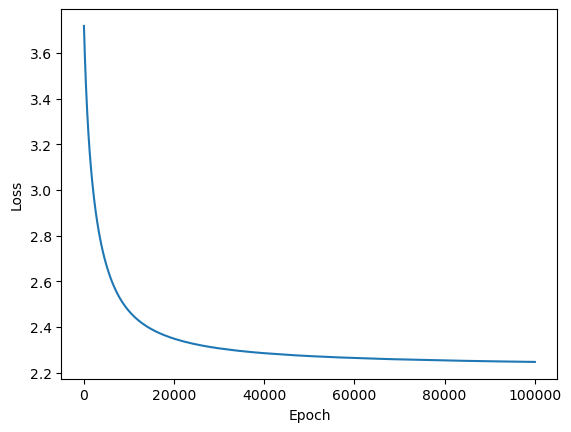

In [40]:
# Plot the loss history
plt.plot(bigram_nnet.loss_history["train"])
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [41]:
torch.save(bigram_nnet, ROOT_DIR / "models" / "bigram_nnet.pt")

## Generate

In [42]:
bigram_nnet = torch.load(ROOT_DIR / "models" / "bigram_nnet.pt")

In [43]:
generator = torch.Generator().manual_seed(36)

for _ in range(30):
    print(
        bigram_nnet.generate(
            mapping_i2c=mapping_i2c, ends_index=mapping_c2i[ENDS], generator=generator
        )
    )

costaury
e
cevellynare
jostelich
stiarce
cqusale
doreride
emman
kiqqusama
msttia
brolmama
eann
cooniendrlofria
dis
mxe
celil
visie
ka
dirben
t
ph
mbgiaydfa
tta
ann
miuda
cathanelodlisutendan

tuteya
ria
rimarielicahanandiniane
